In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [5]:
animals=glob.glob("/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/*-A-*")
x=animals[0]
y=x.split("/")
a=x.split("/")[-1]
animals2=[x.split("/")[-1] for x in animals]
test=animals2[0]
animals3=[test.replace(".csv","") for test in animals2]
animals4=[x.replace("-A","") for x in animals3]
print(animals4)

['190626-03-top', '190626-06-bottom', '190626-06-top', '190626-01-bottom', '190626-04-bottom', '190626-05-top', '190626-04-top', '190626-03-bottom', '190626-02-top', '190626-02-bottom', '190626-05-bottom', '190626-01-top']


['190626-03-top', '190626-06-bottom', '190626-06-top', '190626-01-bottom', '190626-04-bottom', '190626-05-top', '190626-04-top', '190626-03-bottom', '190626-02-top', '190626-02-bottom', '190626-05-bottom', '190626-01-top']
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-03-E-top.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-03-A-top.csv


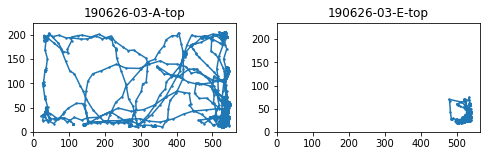

/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-06-E-bottom.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-06-A-bottom.csv


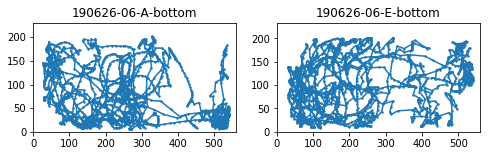

/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-06-E-top.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-06-A-top.csv


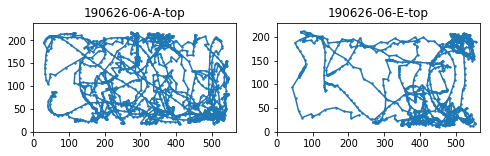

/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-01-E-bottom.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-01-A-bottom.csv


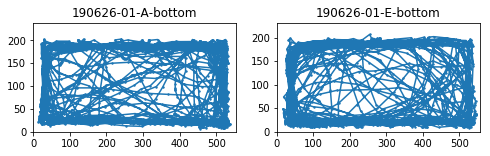

/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-04-E-bottom.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-04-A-bottom.csv


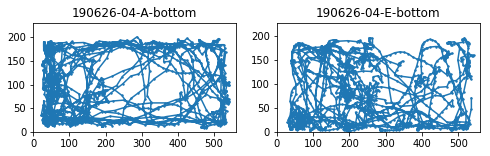

/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-05-E-top.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-05-A-top.csv


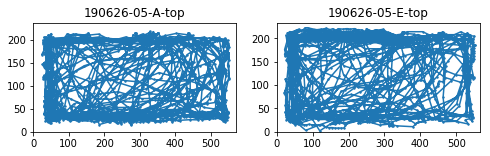

/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-04-E-top.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-04-A-top.csv


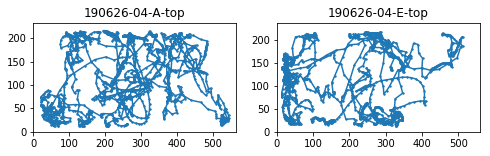

/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-03-E-bottom.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-03-A-bottom.csv


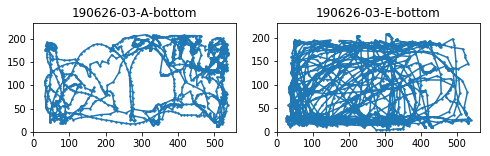

/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-02-E-top.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-02-A-top.csv


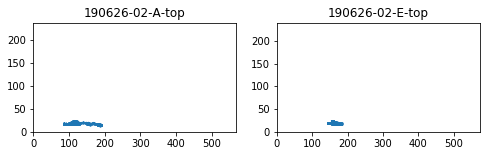

/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-02-E-bottom.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-02-A-bottom.csv


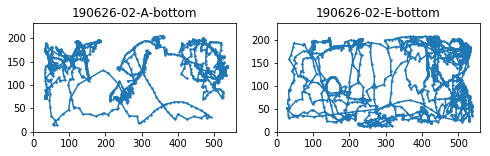

/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-05-E-bottom.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-05-A-bottom.csv


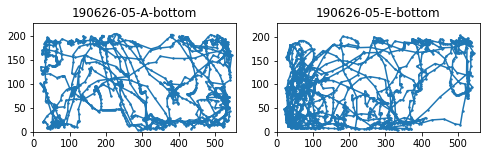

/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-01-E-top.csv
/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/190626-01-A-top.csv


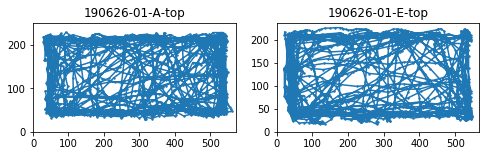

In [4]:
experimentIDs=animals4
print(experimentIDs)
experimentID="190626-04-bottom"

for experimentID in experimentIDs:


    #this code plots the experiment and acclimation next to each other
    #read in the experiment and acclimation files

    test=experimentID.split("-")

    datenum=test[0]+"-"+test[1]

    position=test[-1]

    experimentfilename="/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/"\
        +datenum+"-E-"+position+".csv"
    print(experimentfilename)

    acclimationfilename="/home/eleanor/Documents/aedes-aegypti-2020/data/trajectories/video_csvs/"\
        +datenum+"-A-"+position+".csv"
    print(acclimationfilename)

    dfexperiment=pd.read_csv(experimentfilename)

    dfacclimation=pd.read_csv(acclimationfilename)

    #this code names max. num. for x and y variables in experiment 
    w=np.mean(dfexperiment["pixel_width"])
    h=np.mean(dfexperiment["pixel_height"])

    #this code gives (x,y) coordinates for experiment
    x=dfexperiment["position_x"]
    y=dfexperiment["position_y"]

    #this code names max. num. for x and y variables in acclimation
    wa=np.mean(dfacclimation["pixel_width"])
    ha=np.mean(dfacclimation["pixel_height"])

    #this code gives (x,y) coordinates for acclimation
    xa=dfacclimation["position_x"]
    ya=dfacclimation["position_y"]

    fig=plt.figure(figsize=(8,2))
    ax=fig.add_subplot(1,2,1)
    ax.scatter(xa,ya,s=2)
    ax.set_xlim(0,wa)
    ax.set_ylim(0,ha)
    ax.plot(xa,ya)
    ax.set_title(datenum+"-A-"+position)

    dx=fig.add_subplot(1,2,2)
    dx.scatter(x,y,s=2)
    dx.set_xlim(0,w)
    dx.set_ylim(0,h)
    dx.plot(x,y)
    dx.set_title(datenum+"-E-"+position)
    plt.show()